<a href="https://colab.research.google.com/github/Fin-N1049/DeepLearning/blob/main/PPCA%26ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

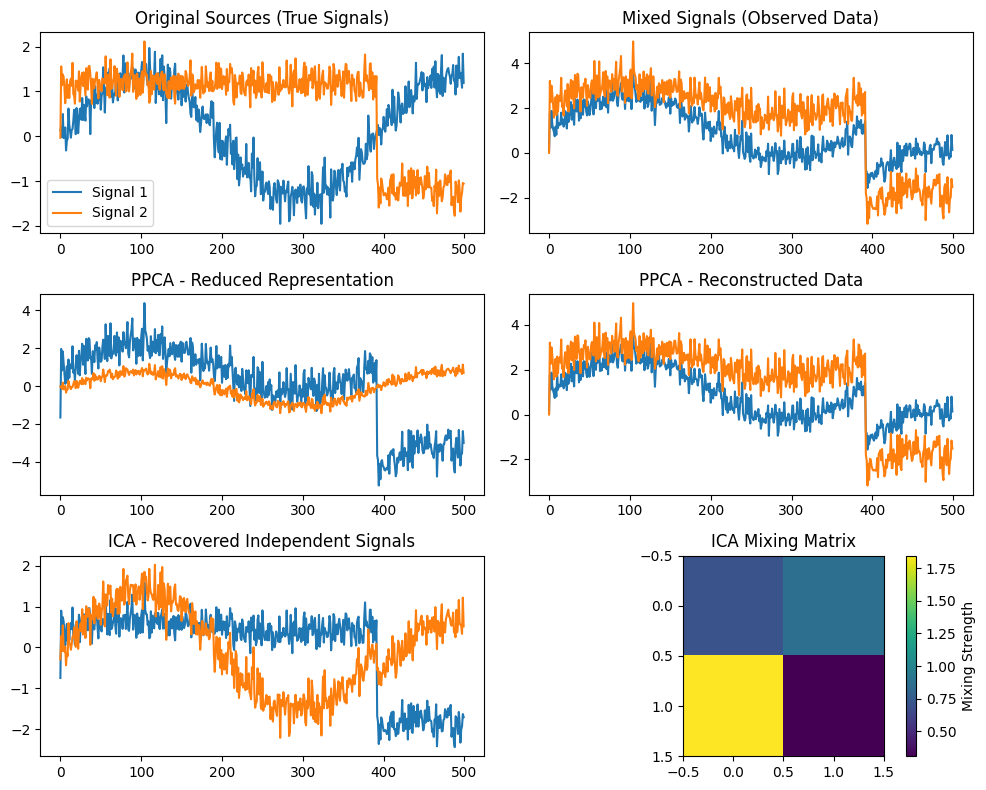

In [1]:
# ======================================
# Probabilistic PCA (PPCA) and ICA Example
# Author: Finson N
# ======================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Generate synthetic data
np.random.seed(42)
n_samples = 500
x1 = np.sin(np.linspace(0, 8, n_samples))
x2 = np.sign(np.sin(np.linspace(0, 4, n_samples)))
S = np.c_[x1, x2]
S += 0.2 * np.random.randn(*S.shape)  # Add noise
S /= S.std(axis=0)

# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = S @ A.T

# -----------------------
# Probabilistic PCA (PPCA)
# -----------------------
# PPCA can be approximated using PCA with added Gaussian noise interpretation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_recon = pca.inverse_transform(X_pca)

# -----------------------
# Independent Component Analysis (ICA)
# -----------------------
ica = FastICA(n_components=2, random_state=42)
S_ica = ica.fit_transform(X)  # Reconstructed sources
A_ica = ica.mixing_

# -----------------------
# Visualization
# -----------------------
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.title("Original Sources (True Signals)")
plt.plot(S[:, 0], label='Signal 1')
plt.plot(S[:, 1], label='Signal 2')
plt.legend()

plt.subplot(3, 2, 2)
plt.title("Mixed Signals (Observed Data)")
plt.plot(X[:, 0])
plt.plot(X[:, 1])

plt.subplot(3, 2, 3)
plt.title("PPCA - Reduced Representation")
plt.plot(X_pca[:, 0])
plt.plot(X_pca[:, 1])

plt.subplot(3, 2, 4)
plt.title("PPCA - Reconstructed Data")
plt.plot(X_pca_recon[:, 0])
plt.plot(X_pca_recon[:, 1])

plt.subplot(3, 2, 5)
plt.title("ICA - Recovered Independent Signals")
plt.plot(S_ica[:, 0])
plt.plot(S_ica[:, 1])

plt.subplot(3, 2, 6)
plt.title("ICA Mixing Matrix")
plt.imshow(A_ica, cmap='viridis')
plt.colorbar(label='Mixing Strength')

plt.tight_layout()
plt.show()
